<a href="https://colab.research.google.com/github/hyeonbeen212/Data-Analysys-Programmi/blob/main/%EB%8D%B0%EB%B6%84%ED%94%84%EA%B8%B0%EB%A7%90_202211613_%EC%98%A4%ED%98%84%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 준비

In [171]:
#관련 라이브러리 불러오기
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#adult income dataset 불러오기
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [172]:
adult_copy_backup = df.copy()
adult_copy_backup

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 데이터 보기

In [173]:
df.info() #데이터프레임 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [174]:
df.describe() #데이터프레임 기초 통계 확인

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [175]:
df.describe(include=["O"]) #범주형 기초 통계 확인

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [176]:
df.dtypes #데이터 유형 확인

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [177]:
df.loc[0] #데이터 행 인덱스 확인

age                               25
workclass                    Private
fnlwgt                        226802
education                       11th
educational-num                    7
marital-status         Never-married
occupation         Machine-op-inspct
relationship               Own-child
race                           Black
gender                          Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
income                         <=50K
Name: 0, dtype: object

In [178]:
df.head() #상위 데이터 추출

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [179]:
df.tail() #하위 데이터 추출

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [180]:
df.index #데이터프레임 인덱스 보기

RangeIndex(start=0, stop=48842, step=1)

In [181]:
df.values #행, 열 구조 보기

array([[25, 'Private', 226802, ..., 40, 'United-States', '<=50K'],
       [38, 'Private', 89814, ..., 50, 'United-States', '<=50K'],
       [28, 'Local-gov', 336951, ..., 40, 'United-States', '>50K'],
       ...,
       [58, 'Private', 151910, ..., 40, 'United-States', '<=50K'],
       [22, 'Private', 201490, ..., 20, 'United-States', '<=50K'],
       [52, 'Self-emp-inc', 287927, ..., 40, 'United-States', '>50K']],
      dtype=object)

In [182]:
df.sort_values(by=['fnlwgt'], axis=0) #개인 가중치 기준 오름차순 정렬

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33377,25,?,12285,Some-college,10,Never-married,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K
16044,40,State-gov,13492,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Amer-Indian-Eskimo,Male,0,0,84,United-States,<=50K
7668,44,Private,13769,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,>50K
1060,42,Private,13769,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,<=50K
43488,23,Private,13769,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31850,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K
33020,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K
34419,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
30730,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K


In [183]:
df.sort_values(by=['fnlwgt'], axis=0, ascending=False) #개인 가중치 기준 내림차순 정렬

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7974,27,Private,1490400,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
30730,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K
34419,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
33020,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K
31850,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,42,Private,13769,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,<=50K
7668,44,Private,13769,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,>50K
43488,23,Private,13769,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K
16044,40,State-gov,13492,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Amer-Indian-Eskimo,Male,0,0,84,United-States,<=50K


In [184]:
df.sort_index(axis=1) #열 이름 알파벳순 정렬

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,income,marital-status,native-country,occupation,race,relationship,workclass
0,25,0,0,11th,7,226802,Male,40,<=50K,Never-married,United-States,Machine-op-inspct,Black,Own-child,Private
1,38,0,0,HS-grad,9,89814,Male,50,<=50K,Married-civ-spouse,United-States,Farming-fishing,White,Husband,Private
2,28,0,0,Assoc-acdm,12,336951,Male,40,>50K,Married-civ-spouse,United-States,Protective-serv,White,Husband,Local-gov
3,44,7688,0,Some-college,10,160323,Male,40,>50K,Married-civ-spouse,United-States,Machine-op-inspct,Black,Husband,Private
4,18,0,0,Some-college,10,103497,Female,30,<=50K,Never-married,United-States,?,White,Own-child,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,Assoc-acdm,12,257302,Female,38,<=50K,Married-civ-spouse,United-States,Tech-support,White,Wife,Private
48838,40,0,0,HS-grad,9,154374,Male,40,>50K,Married-civ-spouse,United-States,Machine-op-inspct,White,Husband,Private
48839,58,0,0,HS-grad,9,151910,Female,40,<=50K,Widowed,United-States,Adm-clerical,White,Unmarried,Private
48840,22,0,0,HS-grad,9,201490,Male,20,<=50K,Never-married,United-States,Adm-clerical,White,Own-child,Private


In [185]:
df.sum(axis=1) #단순 열 합계

<ipython-input-185-3751492f42a4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1) #단순 열 합계


0        226874
1         89911
2        337031
3        168105
4        103555
          ...  
48837    257379
48838    154463
48839    152017
48840    201541
48841    303052
Length: 48842, dtype: int64

In [186]:
#범주형 변수 고유값 확인
unique_workclass = df['workclass'].unique()
unique_ed = df['education'].unique()
unique_status = df['marital-status'].unique()
unique_occupation = df['occupation'].unique()
unique_relate = df['relationship'].unique()
unique_country = df['native-country'].unique()
print("Workclass: ", unique_workclass)
print("Education: ", unique_ed)
print("Marital-status: ", unique_status)
print("Occupation ", unique_occupation)
print("Relationship: ", unique_relate)
print("Native-country: ", unique_country)

Workclass:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Education:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Marital-status:  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Occupation  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Relationship:  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Native-country:  ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'I

## 데이터 클린징

In [187]:
df.count() #데이터 갯수 확인

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [188]:
df.isnull().sum() #결측치 확인

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [189]:
df['workclass'].replace("?", np.nan, inplace=True) #'workclass' 열의 '?'값 NaN으로 대체
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [190]:
df.dropna(subset=['workclass'], inplace=True) #NaN값을 포함하는 행 삭제
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [191]:
df['occupation'].replace("?", np.nan, inplace=True) #'occupation' 열의 '?'값 NaN으로 대체
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [192]:
df.dropna(subset=['occupation'], inplace=True) #NaN값을 포함하는 행 삭제
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [193]:
df['native-country'].replace("?", np.nan, inplace=True) #'native-country' 열의 '?'값 NaN으로 대체
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [194]:
df.dropna(subset=['native-country'], inplace=True) #NaN값을 포함하는 행 삭제
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 단일 시각화

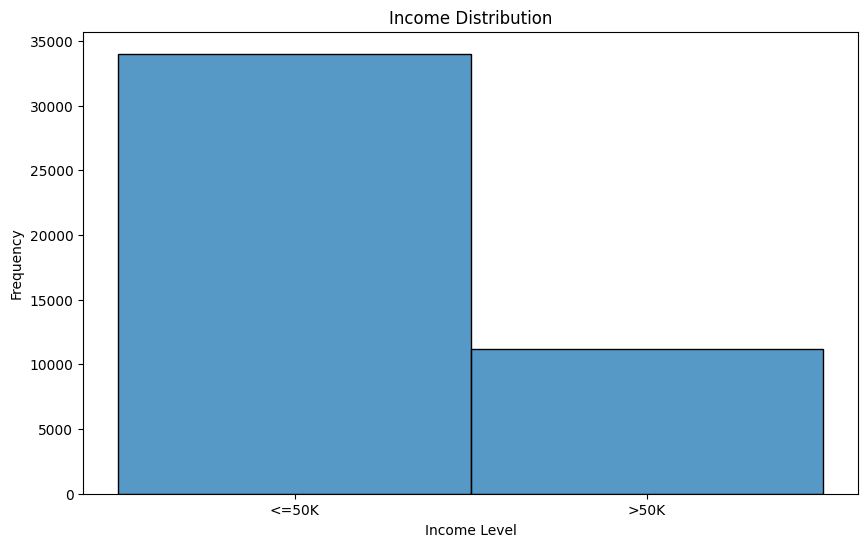

In [195]:
#히스토그램: 소득 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=2, kde=False)
plt.title('Income Distribution')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()
#대다수의 소득이 50,000 달러 이하임을 알 수 있음

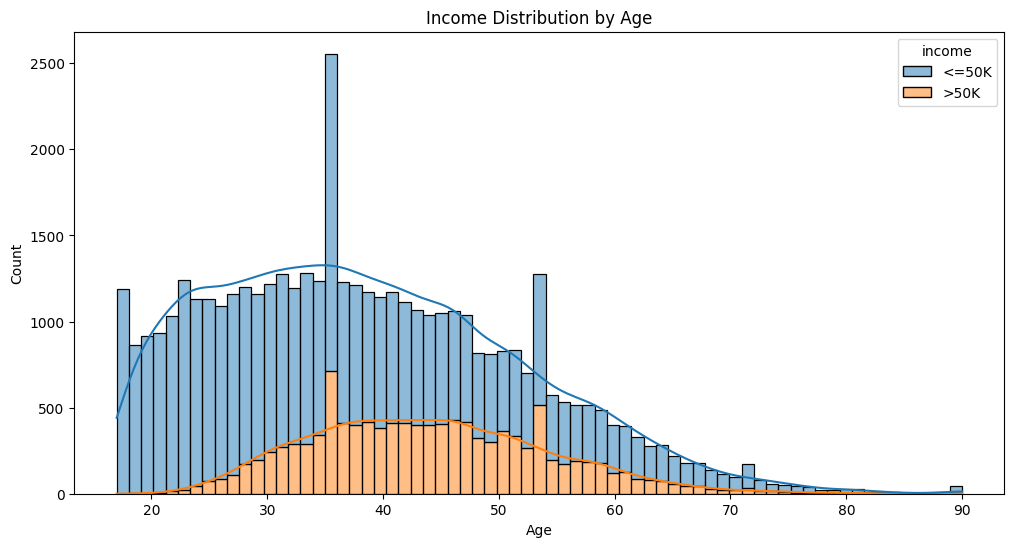

In [198]:
#나이에 따른 소득 분포
plt.figure(figsize=(12, 6))
sns.histplot(df, x='age', hue='income', multiple='stack', kde=True)
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
#30~40세 사이가 가장 소득이 많은 것을 확인

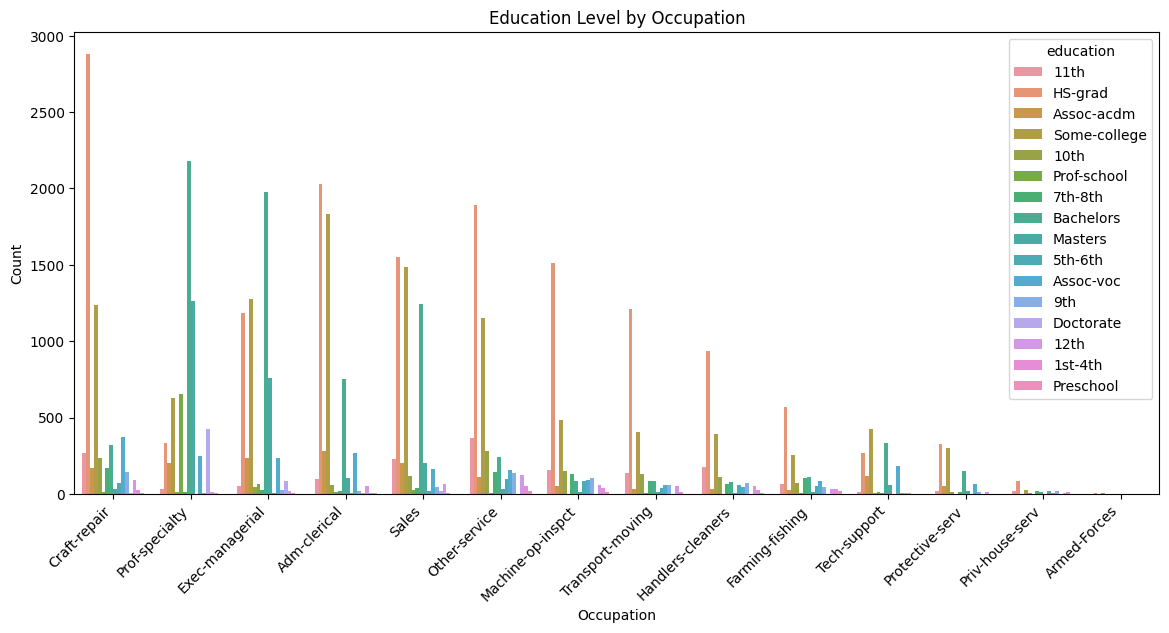

In [199]:
#직업에 따른 교육 수준
plt.figure(figsize=(14, 6))
sns.countplot(x='occupation', hue='education', data=df, order=df['occupation'].value_counts().index)
plt.title('Education Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
#11th, 7-8th의 소득 수준이 가장 높은 것 확인

<ipython-input-201-4203672d7459>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='relationship', y='hours-per-week', data=df, ci=None, order=df.groupby('relationship')['hours-per-week'].mean().sort_values(ascending=False).index)


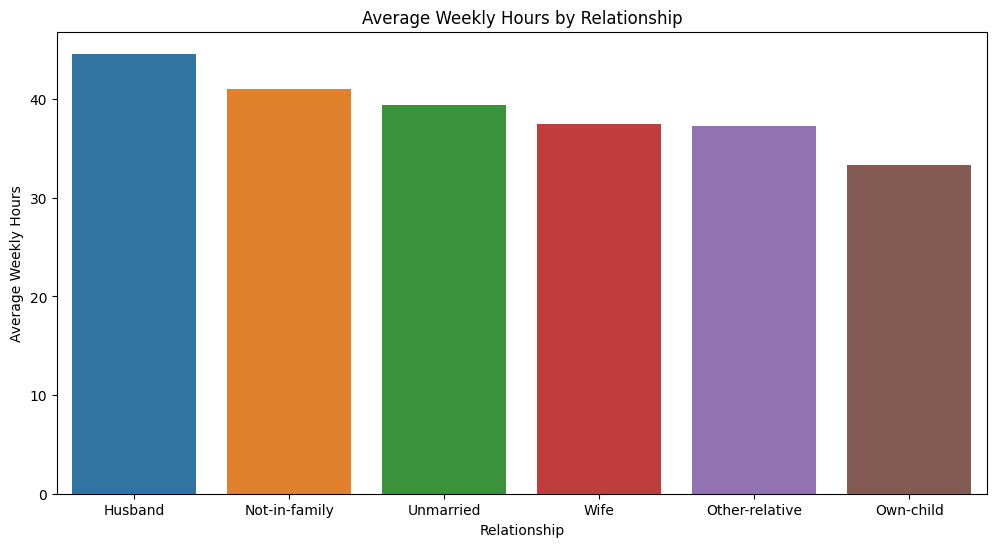

In [201]:
#가족 형태에 따른 근무 시간
plt.figure(figsize=(12, 6))
sns.barplot(x='relationship', y='hours-per-week', data=df, ci=None, order=df.groupby('relationship')['hours-per-week'].mean().sort_values(ascending=False).index)
plt.title('Average Weekly Hours by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Average Weekly Hours')
plt.show()
#남편이 가장 일을 많이 하는 것으로 확인

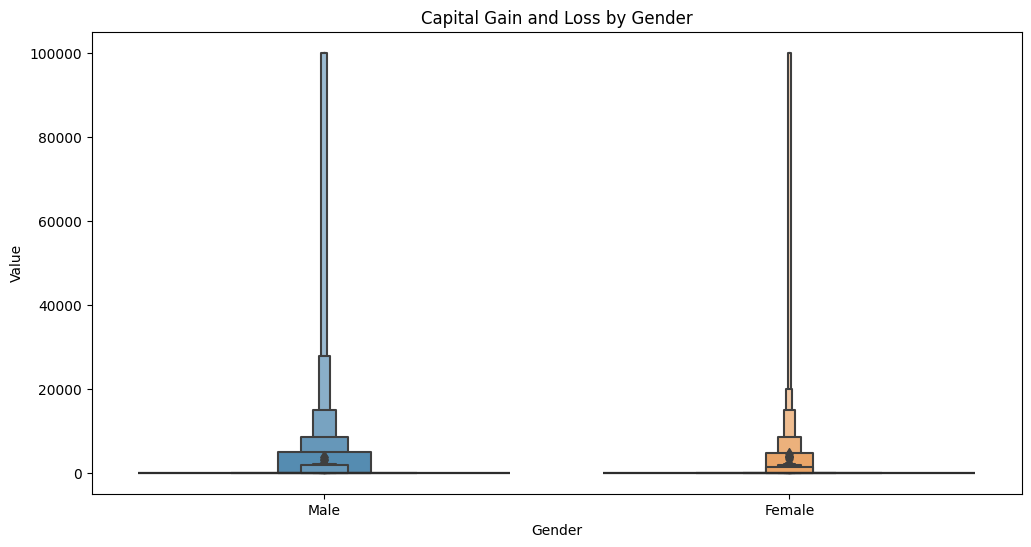

In [202]:
# 성별에 따른 자본 이득과 자본 손실 분포
plt.figure(figsize=(12, 6))
sns.boxenplot(x='gender', y='capital-gain', data=df)
sns.boxenplot(x='gender', y='capital-loss', data=df)
plt.title('Capital Gain and Loss by Gender')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.show()
#자본적인 이득도 손실도 남자가 여자보다 폭이 더 큼을 확인

## 범주형*연속형

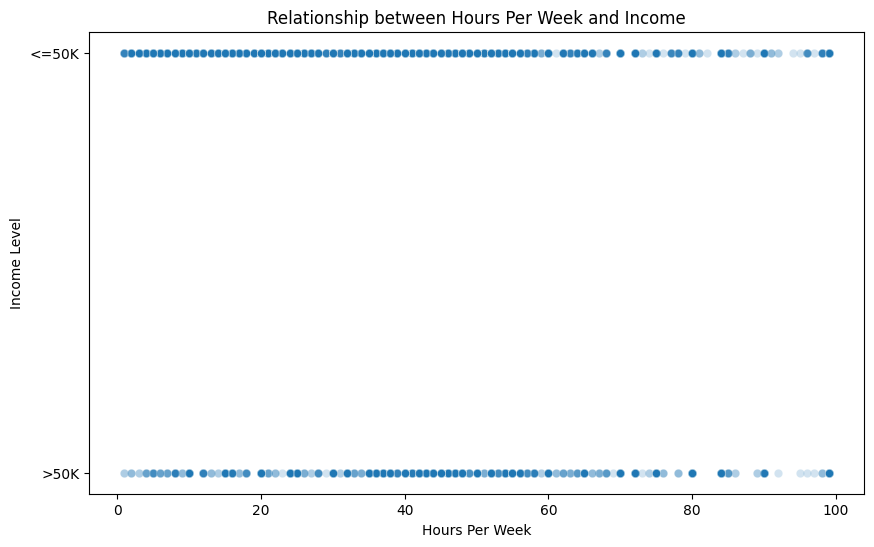

In [203]:
# 산점도: 근로 시간과 소득 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours-per-week', y='income', data=df, alpha=0.2)
plt.title('Relationship between Hours Per Week and Income')
plt.xlabel('Hours Per Week')
plt.ylabel('Income Level')
plt.yticks([0, 1], ['<=50K', '>50K'])
plt.show()
#일반적으로 근로 시간이 증가할수록 소득이 증가

## 범주형*범주형

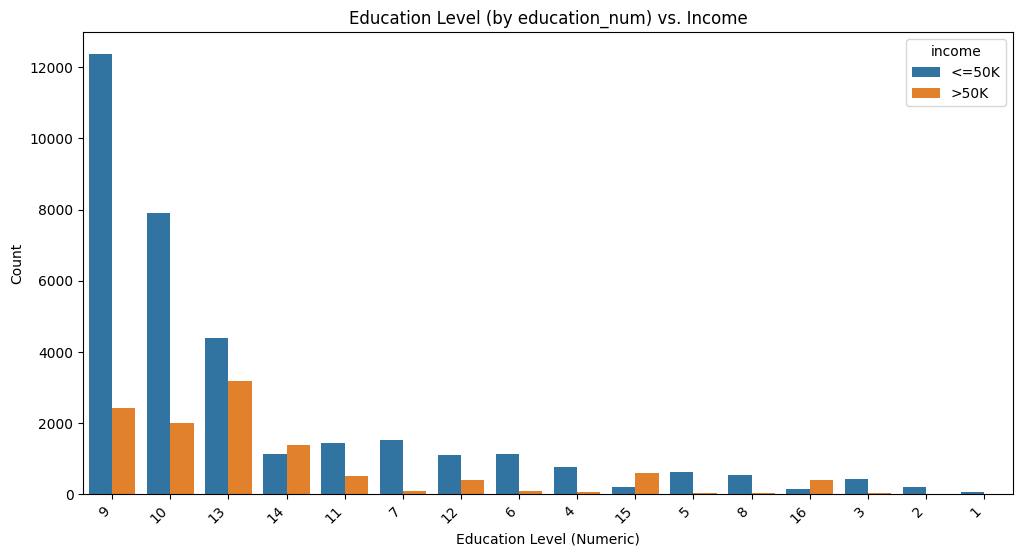

In [204]:
# 막대 그래프: 교육 수준과 소득 관계
plt.figure(figsize=(12, 6))
sns.countplot(x='educational-num', hue='income', data=df, order=df['educational-num'].value_counts().index)
plt.title('Education Level (by education_num) vs. Income')
plt.xlabel('Education Level (Numeric)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
#educational-num의 숫자가 높을수록 교육 수준이 높은 것.
#일반적으로 교육 수준이 높을수록 소득 수준도 높은 것을 확인

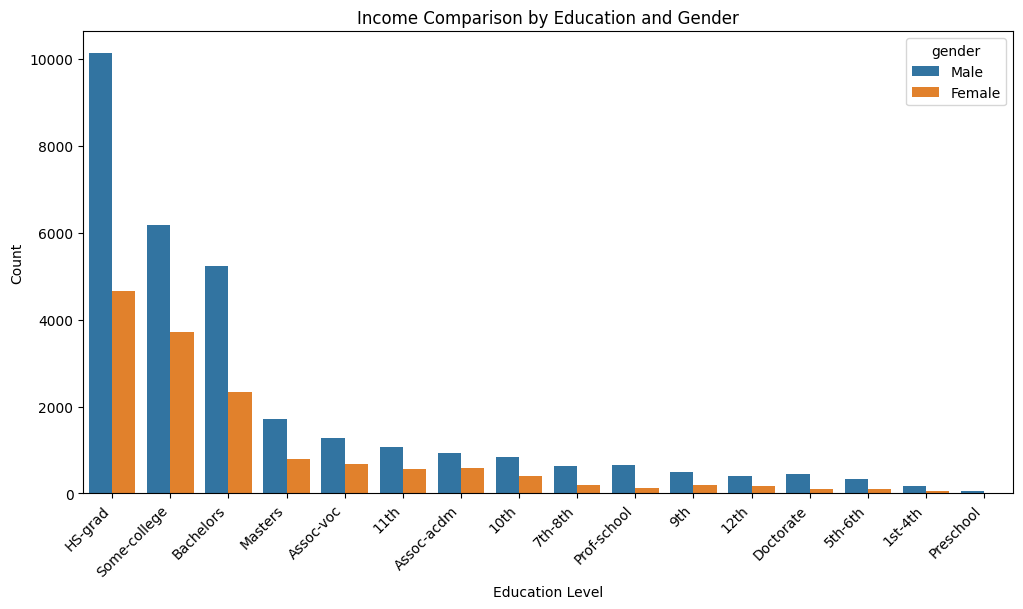

In [205]:
#교육 수준과 성별에 따른 소득 비교
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='gender', data=df, order=df['education'].value_counts().index)
plt.title('Income Comparison by Education and Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
#남자가 여자보다 일반적으로 더 높은 교육 수준을 지님을 확인

## 상관 분석

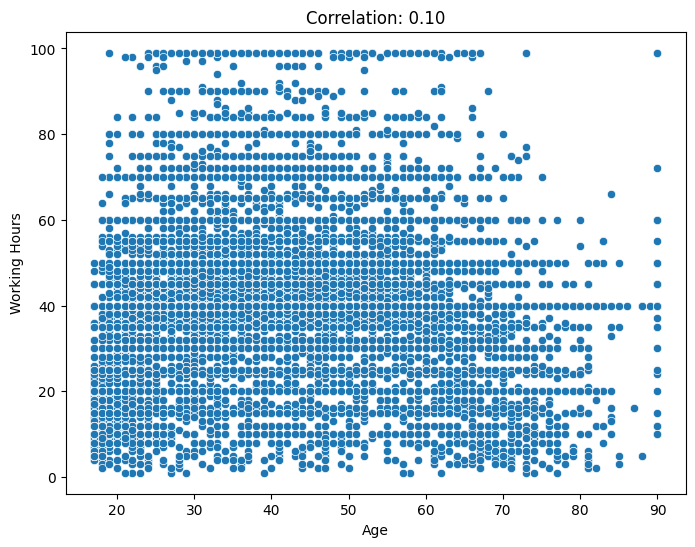

In [206]:
# 나이에 따른 근무시간 상관분석 수행
correlation = df['age'].corr(df['hours-per-week'])

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Age')
plt.ylabel('Working Hours')
plt.show()
# 40세 근처의 나이가 장시간 일하는 빈도수가 더 높음을 확인

## 회귀 분석

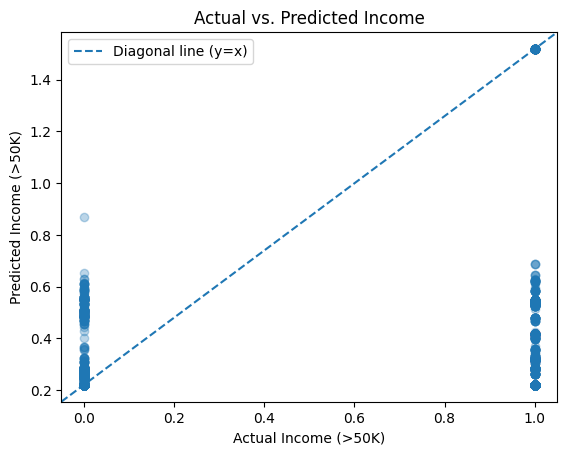

회귀계수 (Coefficients): [1.29944192e-05 1.66206230e-04]
절편 (Intercept): 0.21968376602229742
Training RMSE: 0.42
Testing RMSE: 0.41


In [211]:
# 자본 이득과 자본 손실이 소득에 미치는 영향
# 필요한 열 선택
selected_columns = ['capital-gain', 'capital-loss', 'income']
df1 = df[selected_columns]

# 더미 생성
df1 = pd.get_dummies(df1, columns=['income'], drop_first=True)
X = df1[['capital-gain', 'capital-loss']]
y = df1['income_>50K']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습용 데이터 예측
train_predictions = model.predict(X_train)

# 테스트용 데이터 예측
test_predictions = model.predict(X_test)

# 성능 평가
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
coefficients = model.coef_
intercept = model.intercept_

# 시각화
plt.scatter(y_test, test_predictions, alpha=0.3)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes, label='Diagonal line (y=x)')
plt.title('Actual vs. Predicted Income')
plt.xlabel('Actual Income (>50K)')
plt.ylabel('Predicted Income (>50K)')
plt.legend()
plt.show()

# 결과 출력
print(f'회귀계수 (Coefficients): {coefficients}')
print(f'절편 (Intercept): {intercept}')
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Testing RMSE: {test_rmse:.2f}')

# 자본 이득과 자본 손실은 모델에서 소득을 예측하는 데 일부 영향을 미치지만 회귀계수가 작아 다른 변수들이 소득에 더 영향을 줄 것으로 확인

## 가설 검정

In [216]:
# 결혼 여부와 소득 간의 관계
from scipy.stats import ttest_ind

# 'income' 열의 문자열 값을 숫자로 변환
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# 가설 설정
married_incomes = df[df['marital-status'] == 'Married-civ-spouse']['income']
not_married_incomes = df[df['marital-status'] == 'Never-married']['income']

# t-검정 수행
t_statistic, p_value = ttest_ind(married_incomes, not_married_incomes, equal_var=False)

# 결과 출력
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 검정 결과 해석
if p_value < alpha:
    print("귀무 가설을 기각합니다. 결혼 여부와 소득 간에는 유의미한 차이가 있습니다.")
else:
    print("귀무 가설을 채택합니다. 결혼 여부와 소득 간에는 유의미한 차이가 없습니다.")

T-Statistic: nan
P-Value: nan
귀무 가설을 채택합니다. 결혼 여부와 소득 간에는 유의미한 차이가 없습니다.


## 카이 제곱 검정

In [218]:
# 인종과 근로 시간 간의 독립성
from scipy.stats import chi2_contingency

# 가설 설정
observed_data = pd.crosstab(df['race'], df['hours-per-week'])

# 카이제곱 검정 수행
chi2_stat, p_value, _, _ = chi2_contingency(observed_data)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# 검정 결과 해석
if p_value < alpha:
    print("귀무 가설을 기각합니다. 인종과 근로 시간 간에는 유의미한 관련성이 있습니다.")
else:
    print("귀무 가설을 채택합니다. 인종과 근로 시간 간에는 유의미한 관련성이 없습니다.")

Chi-squared Statistic: 1145.8583160084531
P-Value: 8.4579360569429e-78
귀무 가설을 기각합니다. 인종과 근로 시간 간에는 유의미한 관련성이 있습니다.


## K-Means 클러스터링

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


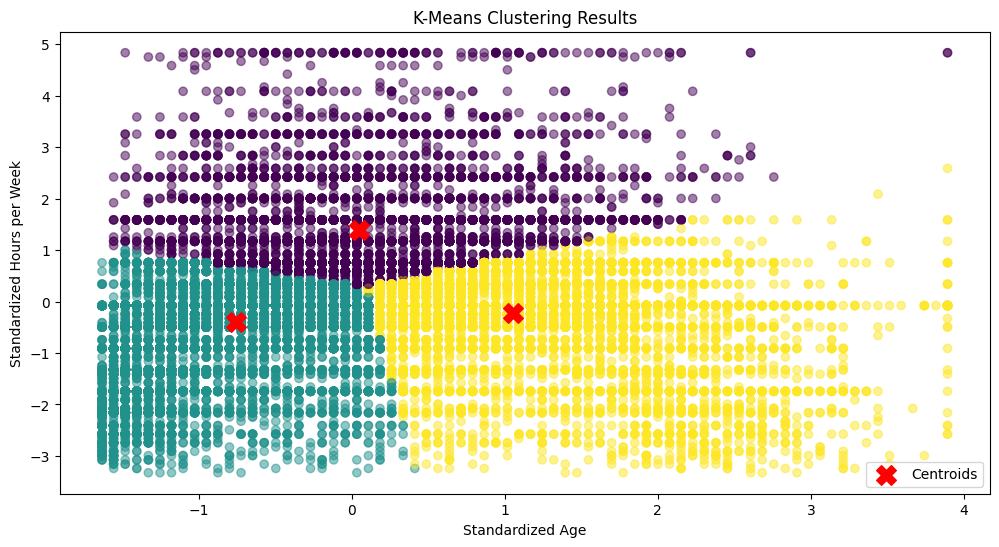

               age  hours-per-week
cluster                           
0        39.207650       57.645496
1        28.578738       36.269096
2        52.476850       38.260118


In [219]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 사용할 특성 선택
features = ['age', 'hours-per-week']

# 선택한 특성 추출
X = df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 군집별 특성 평균 계산
cluster_means = df.groupby('cluster')[features].mean()

# 군집화 결과 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Hours per Week')
plt.legend()
plt.show()

# 군집별 특성 비교
print(cluster_means)

## Adult income 데이터셋 분석
1. 소득 분포:
대다수의 소득이 50,000 달러 이하임을 확인하였습니다. 이는 전체 데이터셋의 주요 소득 수준이 상대적으로 낮다는 것을 나타냅니다.

2. 나이와 소득 관계:
30~40세 사이가 가장 소득이 많은 것을 확인하였습니다. 이는 해당 연령 그룹이 경력이 쌓인 중년층으로, 고소득을 얻을 수 있는 기회가 많기 때문일 수 있습니다.

3. 교육 수준과 소득 관계:
11th, 7-8th 교육 수준이 가장 높은 소득 수준을 지니는 것을 확인하였습니다. 이는 높은 교육 수준이 고소득을 가져오는데 도움이 되는 것으로 나타났습니다.

4. 성별과 근로 시간, 교육 수준 관계:
남자가 여자보다 더 많은 교육 수준을 가지고 있으며, 또한 더 많은 근로 시간을 보이는 것을 확인하였습니다.

5. 자본 이득과 자본 손실:
자본 이득과 자본 손실이 소득에 일부 영향을 미치지만 회귀계수가 작아 다른 변수들이 소득에 더 큰 영향을 미칠 것으로 예상됩니다.

6. 근로 시간과 소득 관계:
근로 시간이 증가할수록 소득도 증가하는 경향을 확인하였습니다. 이는 일반적으로 근로 시간이 길면 높은 소득을 얻을 가능성이 높다는 것을 시사합니다.

7. 결혼 여부와 소득:
가설 검정 결과 결혼 여부와 소득 간에는 유의미한 차이가 없는 것으로 나타났습니다.

8. 인종과 근로 시간 관계:
카이제곱 검정 결과 인종과 근로 시간 간에는 유의미한 관련성이 있음을 확인하였습니다. 이 데이터는 미국 성인 소득 데이터이므로 미국은 다양한 인종이 거주하는 나라이기 때문일 수 있습니다.

9. K-Means 클러스터링 결과:
K-평균 클러스터링 결과를 통해 평균적으로 39세인 군집이 가장 장시간 일하는 것으로 확인되었습니다. 이는 연령이 근로 시간에 영향을 미치는 것으로 나타났습니다.